In [29]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import tensorflow as tf
import keras

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import (Activation,Conv2D,BatchNormalization, SeparableConv2D, MaxPool2D, Activation, Flatten, Dropout, Dense)
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from sklearn.preprocessing import LabelEncoder

In [2]:
print(os.listdir("GC10-DET dataset\\images\\"))

SIZE = 128

['niemetaliczne_wtracenie', 'otwor', 'plama_oleju', 'pofaldowanie', 'pol_okragla_przerwa', 'porowatosc', 'spaw', 'wada_walcowania', 'wyplukanie', 'zluszczonie']


In [3]:
images = []
labels = [] 
for directory_path in glob.glob("GC10-DET dataset\\images\\*"):
    label = directory_path.split("\\")[-1]
    #print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        images.append(img)
        labels.append(label)

GC10-DET dataset\images\niemetaliczne_wtracenie\img_01_425391700_00025.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_01_425392100_00886.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_01_425503100_00018.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_01_425505100_01400.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_01_4406743300_00935.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_02_3402617100_00366.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_02_3436816100_00147.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_02_3436816100_00148.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_02_3436816100_00150.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_02_3436816100_00152.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_02_3436816100_00153.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_02_424799200_00150.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_02_424799300_00850.jpg
GC10-DET dataset\i

GC10-DET dataset\images\niemetaliczne_wtracenie\img_05_425243500_00952.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_05_425243500_00953.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_05_425243500_01096.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_05_425243500_01098.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_05_425243500_01116.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_05_425244300_00741.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_05_425244400_00881.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_05_425502300_00026.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_05_425503200_00065.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_05_425504900_00057.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_05_425505900_01176.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_05_4406562900_00008.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_06_3402617700_00988.jpg
GC10-DET dataset\images

GC10-DET dataset\images\otwor\img_02_425614700_00001.jpg
GC10-DET dataset\images\otwor\img_02_425616500_00001.jpg
GC10-DET dataset\images\otwor\img_02_425637700_00001.jpg
GC10-DET dataset\images\otwor\img_02_425637800_00891.jpg
GC10-DET dataset\images\otwor\img_02_425637900_00899.jpg
GC10-DET dataset\images\otwor\img_02_425640000_00634.jpg
GC10-DET dataset\images\otwor\img_02_425640100_00874.jpg
GC10-DET dataset\images\otwor\img_02_425644200_00681.jpg
GC10-DET dataset\images\otwor\img_02_425644600_00001.jpg
GC10-DET dataset\images\otwor\img_03_3403331900_01545.jpg
GC10-DET dataset\images\otwor\img_03_3403392000_01070.jpg
GC10-DET dataset\images\otwor\img_03_3403392100_00870.jpg
GC10-DET dataset\images\otwor\img_03_3403393700_00942.jpg
GC10-DET dataset\images\otwor\img_03_3403393800_01156.jpg
GC10-DET dataset\images\otwor\img_03_3403394000_01158.jpg
GC10-DET dataset\images\otwor\img_03_3403394100_01319.jpg
GC10-DET dataset\images\otwor\img_03_3403394800_00844.jpg
GC10-DET dataset\images

GC10-DET dataset\images\otwor\img_06_424799300_01133.jpg
GC10-DET dataset\images\otwor\img_06_424799400_01079.jpg
GC10-DET dataset\images\otwor\img_06_424799500_00921.jpg
GC10-DET dataset\images\otwor\img_06_425003700_00968.jpg
GC10-DET dataset\images\otwor\img_06_425501100_00051.jpg
GC10-DET dataset\images\otwor\img_06_425501700_00053.jpg
GC10-DET dataset\images\otwor\img_06_425501800_00053.jpg
GC10-DET dataset\images\otwor\img_06_425501900_00054.jpg
GC10-DET dataset\images\otwor\img_06_425502100_00053.jpg
GC10-DET dataset\images\otwor\img_06_425502300_00053.jpg
GC10-DET dataset\images\otwor\img_06_425502600_00052.jpg
GC10-DET dataset\images\otwor\img_06_425502700_00052.jpg
GC10-DET dataset\images\otwor\img_06_425502900_00052.jpg
GC10-DET dataset\images\otwor\img_06_425503300_00053.jpg
GC10-DET dataset\images\otwor\img_06_425503400_00052.jpg
GC10-DET dataset\images\otwor\img_06_425503500_00053.jpg
GC10-DET dataset\images\otwor\img_06_425503600_00053.jpg
GC10-DET dataset\images\otwor\i

GC10-DET dataset\images\plama_oleju\img_04_436163100_00006.jpg
GC10-DET dataset\images\plama_oleju\img_04_436163100_00007.jpg
GC10-DET dataset\images\plama_oleju\img_04_436163100_00008.jpg
GC10-DET dataset\images\plama_oleju\img_04_436163100_00009.jpg
GC10-DET dataset\images\plama_oleju\img_04_436163100_00010.jpg
GC10-DET dataset\images\plama_oleju\img_04_436163100_00012.jpg
GC10-DET dataset\images\plama_oleju\img_04_436163100_00021.jpg
GC10-DET dataset\images\plama_oleju\img_04_436163100_00033.jpg
GC10-DET dataset\images\plama_oleju\img_04_436163100_00039.jpg
GC10-DET dataset\images\plama_oleju\img_04_436163100_00055.jpg
GC10-DET dataset\images\plama_oleju\img_06_425392300_00387.jpg
GC10-DET dataset\images\plama_oleju\img_06_425502300_01395.jpg
GC10-DET dataset\images\plama_oleju\img_06_425502300_01396.jpg
GC10-DET dataset\images\plama_oleju\img_06_425502300_01397.jpg
GC10-DET dataset\images\plama_oleju\img_06_425502300_01398.jpg
GC10-DET dataset\images\plama_oleju\img_06_425502300_01

GC10-DET dataset\images\pofaldowanie\img_06_3436639700_00760.jpg
GC10-DET dataset\images\pofaldowanie\img_06_3436786500_00002.jpg
GC10-DET dataset\images\pofaldowanie\img_06_3436786500_00565.jpg
GC10-DET dataset\images\pofaldowanie\img_06_3436814000_00005.jpg
GC10-DET dataset\images\pofaldowanie\img_06_3436814000_00006.jpg
GC10-DET dataset\images\pofaldowanie\img_06_3436814000_00007.jpg
GC10-DET dataset\images\pofaldowanie\img_06_3436814000_00008.jpg
GC10-DET dataset\images\pofaldowanie\img_06_3436814000_00009.jpg
GC10-DET dataset\images\pofaldowanie\img_06_3436814000_00011.jpg
GC10-DET dataset\images\pofaldowanie\img_06_3436814000_00016.jpg
GC10-DET dataset\images\pofaldowanie\img_06_3436814000_00675.jpg
GC10-DET dataset\images\pofaldowanie\img_06_3436814000_00679.jpg
GC10-DET dataset\images\pofaldowanie\img_06_3436814000_00681.jpg
GC10-DET dataset\images\pofaldowanie\img_06_3436814000_00683.jpg
GC10-DET dataset\images\pofaldowanie\img_06_3436814000_00686.jpg
GC10-DET dataset\images\p

GC10-DET dataset\images\pol_okragla_przerwa\img_01_424799600_00002.jpg
GC10-DET dataset\images\pol_okragla_przerwa\img_01_424825700_00001.jpg
GC10-DET dataset\images\pol_okragla_przerwa\img_01_424826100_00001.jpg
GC10-DET dataset\images\pol_okragla_przerwa\img_01_424826300_00950.jpg
GC10-DET dataset\images\pol_okragla_przerwa\img_01_424826800_00002.jpg
GC10-DET dataset\images\pol_okragla_przerwa\img_01_424826800_00003.jpg
GC10-DET dataset\images\pol_okragla_przerwa\img_01_425006100_00947.jpg
GC10-DET dataset\images\pol_okragla_przerwa\img_01_425006200_01173.jpg
GC10-DET dataset\images\pol_okragla_przerwa\img_01_425006400_00001.jpg
GC10-DET dataset\images\pol_okragla_przerwa\img_01_425006600_00001.jpg
GC10-DET dataset\images\pol_okragla_przerwa\img_01_425007500_00001.jpg
GC10-DET dataset\images\pol_okragla_przerwa\img_01_425007500_01452.jpg
GC10-DET dataset\images\pol_okragla_przerwa\img_01_425007500_01453.jpg
GC10-DET dataset\images\pol_okragla_przerwa\img_01_425007600_01072.jpg
GC10-D

GC10-DET dataset\images\pol_okragla_przerwa\img_05_425502600_00053.jpg
GC10-DET dataset\images\pol_okragla_przerwa\img_05_425502700_00052.jpg
GC10-DET dataset\images\pol_okragla_przerwa\img_05_425502900_00052.jpg
GC10-DET dataset\images\pol_okragla_przerwa\img_05_425502900_00053.jpg
GC10-DET dataset\images\pol_okragla_przerwa\img_05_425503400_00052.jpg
GC10-DET dataset\images\pol_okragla_przerwa\img_05_425503400_00053.jpg
GC10-DET dataset\images\pol_okragla_przerwa\img_05_425503500_00054.jpg
GC10-DET dataset\images\pol_okragla_przerwa\img_05_425503600_00053.jpg
GC10-DET dataset\images\pol_okragla_przerwa\img_05_425503800_00052.jpg
GC10-DET dataset\images\pol_okragla_przerwa\img_05_425503800_00053.jpg
GC10-DET dataset\images\pol_okragla_przerwa\img_05_425504800_00052.jpg
GC10-DET dataset\images\pol_okragla_przerwa\img_05_425505000_00051.jpg
GC10-DET dataset\images\pol_okragla_przerwa\img_05_425505100_00052.jpg
GC10-DET dataset\images\pol_okragla_przerwa\img_05_425505100_00053.jpg
GC10-D

GC10-DET dataset\images\porowatosc\img_01_425005700_00191.jpg
GC10-DET dataset\images\porowatosc\img_01_425005700_00192.jpg
GC10-DET dataset\images\porowatosc\img_01_425005700_00194.jpg
GC10-DET dataset\images\porowatosc\img_01_425005700_00195.jpg
GC10-DET dataset\images\porowatosc\img_01_425005700_00196.jpg
GC10-DET dataset\images\porowatosc\img_01_425005700_00197.jpg
GC10-DET dataset\images\porowatosc\img_01_425005700_00198.jpg
GC10-DET dataset\images\porowatosc\img_01_425005700_00199.jpg
GC10-DET dataset\images\porowatosc\img_01_425005700_00200.jpg
GC10-DET dataset\images\porowatosc\img_01_425005700_00201.jpg
GC10-DET dataset\images\porowatosc\img_01_425005700_00202.jpg
GC10-DET dataset\images\porowatosc\img_01_425005700_00203.jpg
GC10-DET dataset\images\porowatosc\img_01_425005700_00205.jpg
GC10-DET dataset\images\porowatosc\img_01_425005700_00207.jpg
GC10-DET dataset\images\porowatosc\img_01_425005700_00208.jpg
GC10-DET dataset\images\porowatosc\img_01_425005700_00211.jpg
GC10-DET

GC10-DET dataset\images\porowatosc\img_01_4406743300_00186.jpg
GC10-DET dataset\images\porowatosc\img_01_4406743300_00192.jpg
GC10-DET dataset\images\porowatosc\img_01_4406743300_00195.jpg
GC10-DET dataset\images\porowatosc\img_01_4406743300_00197.jpg
GC10-DET dataset\images\porowatosc\img_01_4406743300_00215.jpg
GC10-DET dataset\images\porowatosc\img_01_4406743300_00216.jpg
GC10-DET dataset\images\porowatosc\img_01_4406743300_00223.jpg
GC10-DET dataset\images\porowatosc\img_01_4406743300_00225.jpg
GC10-DET dataset\images\porowatosc\img_01_4406743300_00307.jpg
GC10-DET dataset\images\porowatosc\img_01_4406743300_00447.jpg
GC10-DET dataset\images\porowatosc\img_01_4406743300_00461.jpg
GC10-DET dataset\images\porowatosc\img_01_4406743300_00475.jpg
GC10-DET dataset\images\porowatosc\img_01_4406743300_00637.jpg
GC10-DET dataset\images\porowatosc\img_01_4406743300_00649.jpg
GC10-DET dataset\images\porowatosc\img_01_4406743300_00650.jpg
GC10-DET dataset\images\porowatosc\img_01_4406743300_00

GC10-DET dataset\images\porowatosc\img_03_436150300_00328.jpg
GC10-DET dataset\images\porowatosc\img_03_436150300_00329.jpg
GC10-DET dataset\images\porowatosc\img_03_436150300_00330.jpg
GC10-DET dataset\images\porowatosc\img_03_436150300_00373.jpg
GC10-DET dataset\images\porowatosc\img_03_436150300_00388.jpg
GC10-DET dataset\images\porowatosc\img_03_436152900_00522.jpg
GC10-DET dataset\images\porowatosc\img_03_436152900_00523.jpg
GC10-DET dataset\images\porowatosc\img_03_436152900_00524.jpg
GC10-DET dataset\images\porowatosc\img_03_436152900_00525.jpg
GC10-DET dataset\images\porowatosc\img_03_436152900_00526.jpg
GC10-DET dataset\images\porowatosc\img_03_436152900_00529.jpg
GC10-DET dataset\images\porowatosc\img_03_436152900_00530.jpg
GC10-DET dataset\images\porowatosc\img_03_436152900_00535.jpg
GC10-DET dataset\images\porowatosc\img_03_436152900_00543.jpg
GC10-DET dataset\images\porowatosc\img_03_436152900_00545.jpg
GC10-DET dataset\images\porowatosc\img_03_436152900_00557.jpg
GC10-DET

GC10-DET dataset\images\porowatosc\img_05_4406743300_00562.jpg
GC10-DET dataset\images\porowatosc\img_05_4406743300_00564.jpg
GC10-DET dataset\images\porowatosc\img_05_4406743300_00568.jpg
GC10-DET dataset\images\porowatosc\img_05_4406743300_00570.jpg
GC10-DET dataset\images\porowatosc\img_05_4406743300_00608.jpg
GC10-DET dataset\images\porowatosc\img_05_4406743300_00614.jpg
GC10-DET dataset\images\porowatosc\img_05_4406743300_00615.jpg
GC10-DET dataset\images\porowatosc\img_05_4406743300_00627.jpg
GC10-DET dataset\images\porowatosc\img_05_4406743300_00687.jpg
GC10-DET dataset\images\porowatosc\img_05_4406743300_00849.jpg
GC10-DET dataset\images\porowatosc\img_05_4406743300_00913.jpg
GC10-DET dataset\images\porowatosc\img_06_3436814300_00050.jpg
GC10-DET dataset\images\porowatosc\img_06_3436814300_00056.jpg
GC10-DET dataset\images\porowatosc\img_06_425243200_00116.jpg
GC10-DET dataset\images\porowatosc\img_06_4404580600_01173.jpg
GC10-DET dataset\images\porowatosc\img_06_4406645900_002

GC10-DET dataset\images\porowatosc\img_07_4406645900_00859.jpg
GC10-DET dataset\images\porowatosc\img_07_4406645900_00877.jpg
GC10-DET dataset\images\porowatosc\img_07_4406743300_00026.jpg
GC10-DET dataset\images\porowatosc\img_07_4406743300_00027.jpg
GC10-DET dataset\images\porowatosc\img_07_4406743300_00035.jpg
GC10-DET dataset\images\porowatosc\img_07_4406743300_00036.jpg
GC10-DET dataset\images\porowatosc\img_07_4406743300_00037.jpg
GC10-DET dataset\images\porowatosc\img_07_4406743300_00038.jpg
GC10-DET dataset\images\porowatosc\img_07_4406743300_00039.jpg
GC10-DET dataset\images\porowatosc\img_07_4406743300_00040.jpg
GC10-DET dataset\images\porowatosc\img_07_4406743300_00041.jpg
GC10-DET dataset\images\porowatosc\img_07_4406743300_00042.jpg
GC10-DET dataset\images\porowatosc\img_07_4406743300_00045.jpg
GC10-DET dataset\images\porowatosc\img_07_4406743300_00056.jpg
GC10-DET dataset\images\porowatosc\img_07_4406743300_00060.jpg
GC10-DET dataset\images\porowatosc\img_07_4406743300_00

GC10-DET dataset\images\spaw\img_02_436068400_00001.jpg
GC10-DET dataset\images\spaw\img_02_436149500_00939.jpg
GC10-DET dataset\images\spaw\img_02_436150100_00001.jpg
GC10-DET dataset\images\spaw\img_02_436152900_00001.jpg
GC10-DET dataset\images\spaw\img_02_436153300_00001.jpg
GC10-DET dataset\images\spaw\img_02_436153300_01008.jpg
GC10-DET dataset\images\spaw\img_02_436164000_00006.jpg
GC10-DET dataset\images\spaw\img_02_436164000_00029.jpg
GC10-DET dataset\images\spaw\img_02_436164300_01201.jpg
GC10-DET dataset\images\spaw\img_02_436164700_00001.jpg
GC10-DET dataset\images\spaw\img_02_436165600_00025.jpg
GC10-DET dataset\images\spaw\img_02_436185000_00016.jpg
GC10-DET dataset\images\spaw\img_02_436185500_00005.jpg
GC10-DET dataset\images\spaw\img_02_436185700_00002.jpg
GC10-DET dataset\images\spaw\img_02_4402541100_00001.jpg
GC10-DET dataset\images\spaw\img_02_4402818600_00001.jpg
GC10-DET dataset\images\spaw\img_02_4402851700_00985.jpg
GC10-DET dataset\images\spaw\img_02_440285240

GC10-DET dataset\images\spaw\img_07_3402617400_01102.jpg
GC10-DET dataset\images\spaw\img_07_3403334300_00854.jpg
GC10-DET dataset\images\spaw\img_07_3403334600_00682.jpg
GC10-DET dataset\images\spaw\img_07_3403334800_00898.jpg
GC10-DET dataset\images\spaw\img_07_3403334900_00596.jpg
GC10-DET dataset\images\spaw\img_07_3403335000_01066.jpg
GC10-DET dataset\images\spaw\img_07_3403335100_01063.jpg
GC10-DET dataset\images\spaw\img_07_3403335200_00806.jpg
GC10-DET dataset\images\spaw\img_07_3403335500_00710.jpg
GC10-DET dataset\images\spaw\img_07_3403335600_00795.jpg
GC10-DET dataset\images\spaw\img_07_3403335700_01048.jpg
GC10-DET dataset\images\spaw\img_07_3403335800_00900.jpg
GC10-DET dataset\images\spaw\img_07_3403337700_00899.jpg
GC10-DET dataset\images\spaw\img_07_3403337800_00765.jpg
GC10-DET dataset\images\spaw\img_07_3403338100_00785.jpg
GC10-DET dataset\images\spaw\img_07_3403338900_00683.jpg
GC10-DET dataset\images\spaw\img_07_3403403800_00910.jpg
GC10-DET dataset\images\spaw\im

GC10-DET dataset\images\wyplukanie\img_01_425008500_00260.jpg
GC10-DET dataset\images\wyplukanie\img_01_425008500_00338.jpg
GC10-DET dataset\images\wyplukanie\img_01_425008500_00339.jpg
GC10-DET dataset\images\wyplukanie\img_01_425008500_00410.jpg
GC10-DET dataset\images\wyplukanie\img_01_425008500_00476.jpg
GC10-DET dataset\images\wyplukanie\img_01_425008500_00532.jpg
GC10-DET dataset\images\wyplukanie\img_01_425008500_00584.jpg
GC10-DET dataset\images\wyplukanie\img_01_425008500_00585.jpg
GC10-DET dataset\images\wyplukanie\img_01_425008500_00636.jpg
GC10-DET dataset\images\wyplukanie\img_01_425008500_00677.jpg
GC10-DET dataset\images\wyplukanie\img_01_425008500_00704.jpg
GC10-DET dataset\images\wyplukanie\img_01_425008500_00793.jpg
GC10-DET dataset\images\wyplukanie\img_01_425008500_00794.jpg
GC10-DET dataset\images\wyplukanie\img_01_425008500_00819.jpg
GC10-DET dataset\images\wyplukanie\img_01_425008500_00846.jpg
GC10-DET dataset\images\wyplukanie\img_01_425241400_00039.jpg
GC10-DET

GC10-DET dataset\images\wyplukanie\img_02_4406772100_00673.jpg
GC10-DET dataset\images\wyplukanie\img_02_4406772100_00695.jpg
GC10-DET dataset\images\wyplukanie\img_02_4406772100_00755.jpg
GC10-DET dataset\images\wyplukanie\img_02_4406772100_00758.jpg
GC10-DET dataset\images\wyplukanie\img_02_4406772100_00887.jpg
GC10-DET dataset\images\wyplukanie\img_02_4406772100_01092.jpg
GC10-DET dataset\images\wyplukanie\img_02_4406772100_01181.jpg
GC10-DET dataset\images\wyplukanie\img_02_SIS001540_00034.jpg
GC10-DET dataset\images\wyplukanie\img_02_SIS001540_00088.jpg
GC10-DET dataset\images\wyplukanie\img_02_SIS001540_00105.jpg
GC10-DET dataset\images\wyplukanie\img_03_3402617700_00053.jpg
GC10-DET dataset\images\wyplukanie\img_03_3402617700_00386.jpg
GC10-DET dataset\images\wyplukanie\img_03_3402617700_00768.jpg
GC10-DET dataset\images\wyplukanie\img_03_3402617800_00047.jpg
GC10-DET dataset\images\wyplukanie\img_03_3402618000_00035.jpg
GC10-DET dataset\images\wyplukanie\img_03_424712600_00016.

GC10-DET dataset\images\zluszczonie\img_05_4402826400_01261.jpg
GC10-DET dataset\images\zluszczonie\img_05_4403831800_00930.jpg
GC10-DET dataset\images\zluszczonie\img_05_4405228100_00452.jpg
GC10-DET dataset\images\zluszczonie\img_05_4405381400_00774.jpg
GC10-DET dataset\images\zluszczonie\img_06_3436642500_00002.jpg
GC10-DET dataset\images\zluszczonie\img_06_3436786500_00578.jpg
GC10-DET dataset\images\zluszczonie\img_06_3436814000_00687.jpg
GC10-DET dataset\images\zluszczonie\img_06_427199900_01016.jpg
GC10-DET dataset\images\zluszczonie\img_06_427199900_01134.jpg
GC10-DET dataset\images\zluszczonie\img_06_430103100_01149.jpg
GC10-DET dataset\images\zluszczonie\img_06_430103100_01150.jpg
GC10-DET dataset\images\zluszczonie\img_06_4404616100_00947.jpg
GC10-DET dataset\images\zluszczonie\img_06_4406783500_00003.jpg
GC10-DET dataset\images\zluszczonie\img_07_425004200_00982.jpg
GC10-DET dataset\images\zluszczonie\img_07_427199900_01135.jpg
GC10-DET dataset\images\zluszczonie\img_07_430

In [4]:
images = np.array(images)
labels= np.array(labels)

In [5]:
le = LabelEncoder()
labels=le.fit_transform(labels)
labels

array([0, 0, 0, ..., 9, 9, 9], dtype=int64)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.33, random_state=42)

In [7]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [8]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [9]:
VGG_model = VGG16(weights='imagenet', 
                    include_top=False, 
                    input_shape=(SIZE, SIZE, 3))


In [10]:
for layer in VGG_model.layers:
	layer.trainable = False

In [11]:
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [12]:
with tf.device('/CPU'):
    feature_extractor=VGG_model.predict(x_train)

In [13]:
features = feature_extractor.reshape(feature_extractor.shape[0], -1)

In [14]:
X_for_RF = features

In [15]:
import lightgbm as lgb
model=lgb.LGBMClassifier( device='cpu',learning_rate=0.09,max_depth=-5,random_state=42)



In [16]:
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [30]:
model.fit(X_for_RF, y_train,eval_set=[(X_test_features,y_test),(X_for_RF, y_train)],
          verbose=3,eval_metric='logloss')

C:\Users\robert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[3]	training's multi_logloss: 1.20482	valid_0's multi_logloss: 1.47954
[6]	training's multi_logloss: 0.797208	valid_0's multi_logloss: 1.21067
[9]	training's multi_logloss: 0.541862	valid_0's multi_logloss: 1.0442
[12]	training's multi_logloss: 0.377088	valid_0's multi_logloss: 0.930051
[15]	training's multi_logloss: 0.262867	valid_0's multi_logloss: 0.849583
[18]	training's multi_logloss: 0.185398	valid_0's multi_logloss: 0.782669
[21]	training's multi_logloss: 0.131568	valid_0's multi_logloss: 0.741748
[24]	training's multi_logloss: 0.0938633	valid_0's multi_logloss: 0.713157
[27]	training's multi_logloss: 0.0673938	valid_0's multi_logloss: 0.692234
[30]	training's multi_logloss: 0.0488873	valid_0's multi_logloss: 0.677134
[33]	training's multi_logloss: 0.0361293	valid_0's multi_logloss: 0.665654
[36]	training's multi_logloss: 0.0272603	valid_0's multi_logloss: 0.659176
[39]	training's multi_logloss: 0.0210327	valid_0's multi_logloss: 0.657704
[42]	training's multi_logloss: 0.0167446

LGBMClassifier(device='cpu', learning_rate=0.09, max_depth=-5, random_state=42)

Training set score: 0.995
Test set score: 0.820


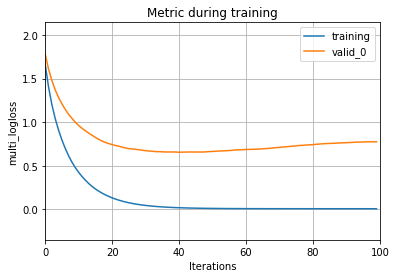

In [18]:
lgb.plot_metric(model)
print('Training set score: {:.3f}'.format(model.score(X_for_RF, y_train)))

print('Test set score: {:.3f}'.format(model.score(X_test_features,y_test)))

In [19]:
prediction_RF_y = model.predict(X_test_features)


In [20]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score( prediction_RF_y, y_test))
from sklearn.metrics import confusion_matrix

Accuracy =  0.8199737187910644


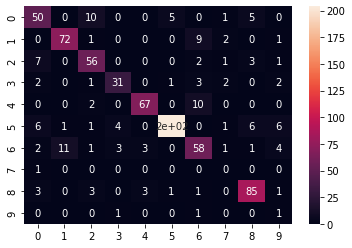

In [21]:
cm = confusion_matrix(prediction_RF_y, y_test)
#print(cm)
sns.heatmap(cm, annot=True)
plt.show()

Predykcja:  ['otwor']
Dana tabelaryczna:  otwor


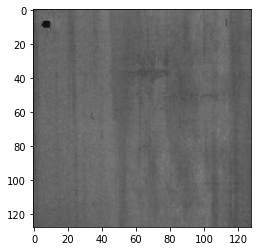

In [22]:
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) 
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = model.predict(input_img_features)[0] 
prediction_RF = le.inverse_transform([prediction_RF])  
print("Predykcja: ", prediction_RF)
print("Dana tabelaryczna: ", le.inverse_transform(y_test)[n])

## produktowy
        

In [23]:
from skimage import measure, io, img_as_ubyte
import matplotlib.pyplot as plt
from skimage.color import label2rgb, rgb2gray
import numpy as np
from skimage.filters import threshold_otsu, threshold_local,threshold_minimum
import pandas as pd


In [24]:
def estimate_prop(i):
    image = img_as_ubyte(rgb2gray(io.imread('pic'+os.sep+files[i])))
    threshold = threshold_minimum(image)
    label_image = measure.label(image < threshold, connectivity=image.ndim)
    plt.imshow(label_image)
    image_label_overlay = label2rgb(label_image, image=image)
    plt.imshow(image_label_overlay)
    plt.show()
    props = measure.regionprops_table(label_image, image, 
                          properties=['label',
                                      'area', 'equivalent_diameter',
                                      'mean_intensity', 'solidity', 'bbox'])

    df = pd.DataFrame(props)
    df=df.sort_values(by=['area'], ascending=False)
    print(df.head())
    

In [25]:
files=os.listdir("pic")

In [26]:
images2=[]
for i in range(0,len(files)):
    img_path2='pic'+os.sep+files[i]
    img = cv2.imread(img_path2, cv2.IMREAD_COLOR)       
    img = cv2.resize(img, (SIZE, SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    images2.append(img)


Predykcja:  ['pofaldowanie']


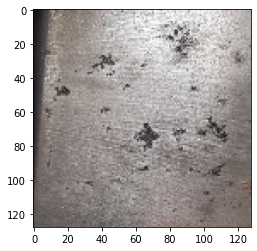

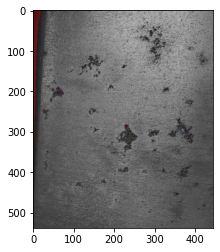

     label  area  equivalent_diameter  mean_intensity  solidity  bbox-0  \
0        1  2724            58.892313       32.430617  0.683392       0   
63      64    39             7.046726       32.205128  0.847826     195   
90      91    27             5.863230       28.814815  0.771429     283   
146    147    19             4.918491       25.210526  0.760000     310   
89      90    19             4.918491       27.263158  0.593750     282   

     bbox-1  bbox-2  bbox-3  
0         0     365      19  
63       63     203      72  
90      227     289     235  
146     387     315     395  
89      364     288     373  
Predykcja:  ['porowatosc']


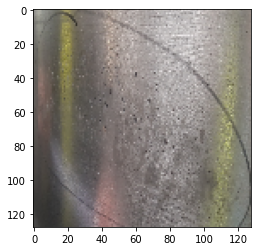

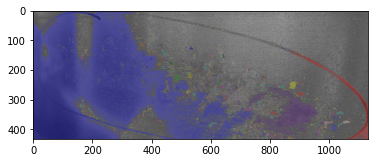

      label    area  equivalent_diameter  mean_intensity  solidity  bbox-0  \
1         2  162995           455.556451       94.236142  0.660787       0   
3775   3776   10621           116.288766      104.171264  0.484513     257   
1610   1611    4499            75.685565       95.151367  0.142558     137   
4225   4226     653            28.834449      104.483920  0.385478     277   
3292   3293     464            24.306031      103.155172  0.695652     236   

      bbox-1  bbox-2  bbox-3  
1          0     433     756  
3775     776     431     965  
1610     867     433    1131  
4225     716     323     790  
3292     862     266     892  


In [27]:
for i in range(0, len(files)):
    input_img = np.expand_dims(images2[i], axis=0)
    input_img_feature=VGG_model.predict(input_img)
    input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
    prediction_RF = model.predict(input_img_features)[0] 
    prediction_RF = le.inverse_transform([prediction_RF])  
    print("Predykcja: ", prediction_RF)
    plt.imshow(images2[i])
    plt.show()
    estimate_prop(i)
    plt.show()

    